# 📓 Chapter 8 Notebook  
## Waves and Sound  
### *From basic wave properties to ultrasound and echolocation*  

This notebook is **beginner-friendly**: most cells are “change a number → run → interpret.”  
Optional **advanced** cells are pre-filled and can be run without understanding every line.


---
## 🧠 Learning Goals

By the end of this notebook, you will be able to:

- Describe a **sinusoidal wave** using amplitude, frequency, and wavelength
- Use the universal relationship **v = f·λ**
- Relate **amplitude** and **intensity**
- Understand why **higher-frequency ultrasound** improves resolution but reduces penetration
- Model the **pulse–echo** principle (A-mode and a simple B-mode line)
- Compare typical **echolocation frequencies** and wavelengths across animals


---
## ✅ Setup (run once)

If you see missing package errors, run the install cell once and restart the kernel.


In [ ]:
%pip install matplotlib numpy ipywidgets

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

---
## 🌊 Part 1 — A Simple 1D Sound Wave (Sine Wave)

A sound wave (pressure wave) can be modeled as a sinusoid.

A common form is:
$$
p(x,t)=p_0 + \Delta p \sin(2\pi f t - 2\pi x/\lambda)
$$

Where:
- $f$ is frequency (Hz)
- $\lambda$ is wavelength (m)
- $\Delta p$ sets amplitude (pressure change)

We’ll plot the wave as a function of **position** for a fixed time.


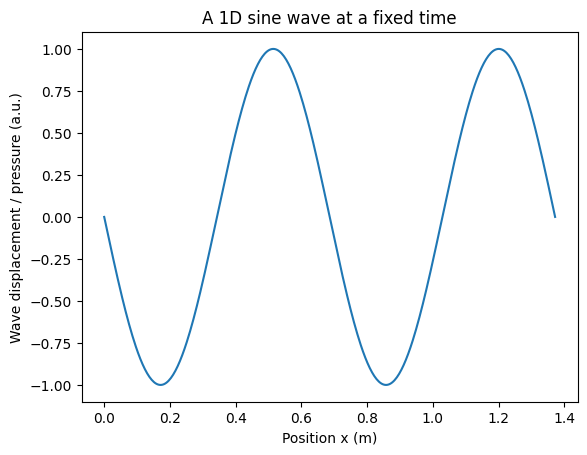

0.686

In [4]:
# --- Wave parameters ---
A = 1.0          # amplitude (arbitrary units)
f = 500          # Hz
v = 343          # m/s speed of sound in air (approx at 20°C)
lam = v / f      # wavelength (m)

# Position axis (meters)
x = np.linspace(0, 2*lam, 400)  # show two wavelengths
t = 0.0                         # seconds

y = A * np.sin(2*np.pi*f*t - 2*np.pi*x/lam)

plt.plot(x, y)
plt.xlabel("Position x (m)")
plt.ylabel("Wave displacement / pressure (a.u.)")
plt.title("A 1D sine wave at a fixed time")
plt.show()

lam

### Try this
- Change `f` (frequency).  
- Notice how `lam` (wavelength) changes through **λ = v / f**.


---
## 🧱 Part 2 — Speed of Sound Depends on the Medium

The speed of sound depends on the **stiffness** and **density** of the medium.
In general, sound travels faster in stiffer media and slower in less stiff media.

Typical values from the draft:
- Air: ~343 m/s (20°C)
- Water: ~1481 m/s
- Soft tissue (ultrasound): ~1540 m/s

The universal relationship is:
$$
v = f\lambda
$$


In [5]:
# Choose a frequency and compare wavelengths in different media
f = 2000  # Hz

v_air = 343
v_water = 1481
v_tissue = 1540

lam_air = v_air / f
lam_water = v_water / f
lam_tissue = v_tissue / f

lam_air, lam_water, lam_tissue

(0.1715, 0.7405, 0.77)

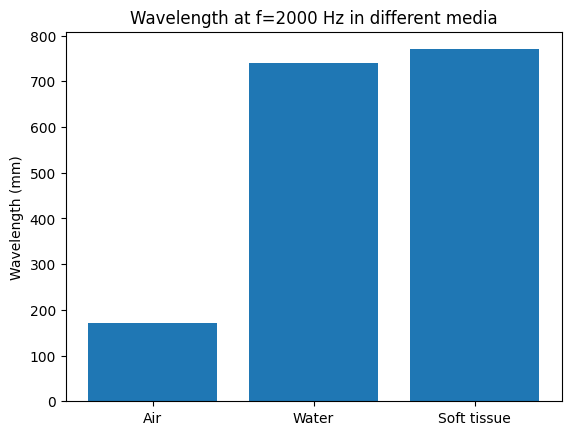

In [6]:
labels = ["Air", "Water", "Soft tissue"]
lams_mm = [lam_air*1000, lam_water*1000, lam_tissue*1000]

plt.bar(labels, lams_mm)
plt.ylabel("Wavelength (mm)")
plt.title(f"Wavelength at f={f} Hz in different media")
plt.show()

**Interpretation:** at the same frequency, higher sound speed means longer wavelength.

For ultrasound, we often use **MHz** frequencies, which produce very short wavelengths (sub-mm),
allowing fine spatial resolution.


---
## 🔊 Part 3 — Amplitude and Intensity (Why loudness scales quickly)

Intensity is power per area (W/m²). Intensity increases with the **square** of amplitude, and for many mechanical wave contexts, also scales with $f^2$.

We’ll demonstrate the **amplitude-squared** effect with a simple proportional model:
$$
I \propto A^2
$$


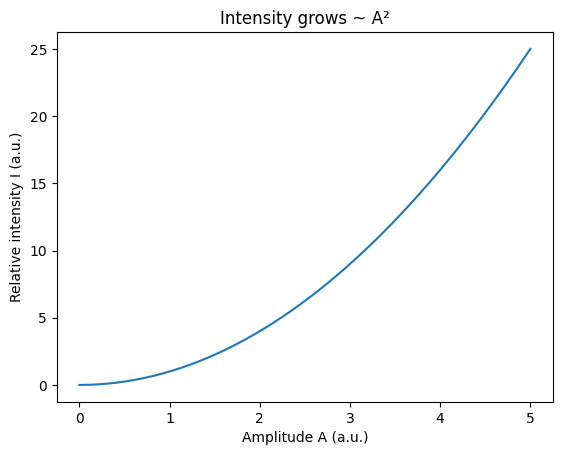

In [7]:
A_values = np.linspace(0, 5, 50)
I_values = A_values**2   # proportional model

plt.plot(A_values, I_values)
plt.xlabel("Amplitude A (a.u.)")
plt.ylabel("Relative intensity I (a.u.)")
plt.title("Intensity grows ~ A²")
plt.show()

### Try this
If amplitude doubles, intensity increases by a factor of **4**.


---
## 🧫 Part 4 — Frequency vs Penetration Depth (Attenuation)

In tissue, ultrasound intensity decreases with depth due to absorption and scattering.

A common simple model is exponential attenuation:
$$
I(x) = I_0 \, e^{-2\alpha x}
$$
Where:
- $x$ is depth (m)
- $\alpha$ is an attenuation coefficient (Np/m)

A useful rule-of-thumb in medical ultrasound is that attenuation increases roughly **linearly**
with frequency: higher frequency → **better resolution** but **less penetration**.

Below we simulate this idea with a simple model $$\alpha = k f$$


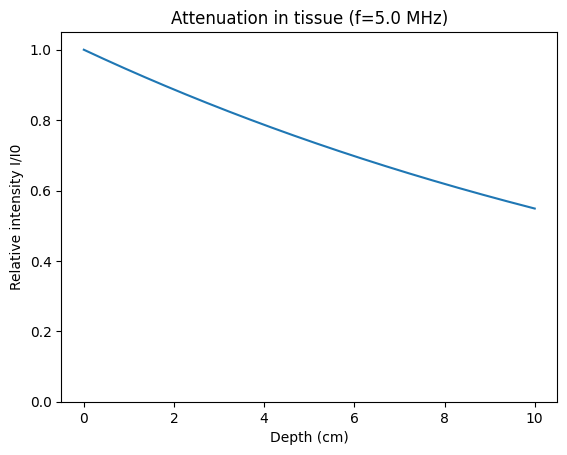

3.0

In [8]:
# Frequency in MHz (typical ultrasound range)
f_MHz = 5.0   # MHz

# Simple linear attenuation model: alpha = k * f
# k is chosen just to make the plot clear; units are model-specific here.
k = 0.6       # (Np/m)/MHz  (illustrative)
alpha = k * f_MHz

x = np.linspace(0, 0.10, 400)  # 0 to 10 cm
I0 = 1.0
I = I0 * np.exp(-2*alpha*x)

plt.plot(x*100, I)
plt.xlabel("Depth (cm)")
plt.ylabel("Relative intensity I/I0")
plt.title(f"Attenuation in tissue (f={f_MHz} MHz)")
plt.ylim(0, 1.05)
plt.show()

alpha

### Try this
Change `f_MHz` to 2, 5, 10 MHz and compare the curves.

**Take-home:** higher frequency loses intensity faster with depth (reduced penetration).  


---
## 📡 Part 5 — Pulse–Echo Ultrasound (A-mode idea)

In ultrasound, we send a short pulse and measure returning echoes.
Echo time gives depth:

$$
d = \frac{c \, t}{2}
$$

The factor of 2 is because the wave travels **to the reflector and back**.

We’ll simulate a 1D “A-mode” trace:
- choose reflector depths
- generate echoes with different amplitudes
- include attenuation with depth


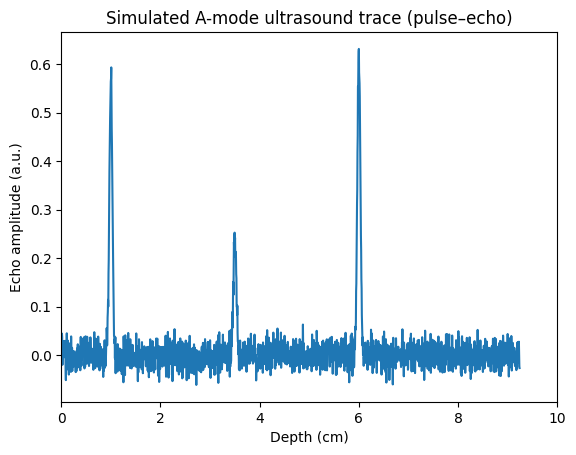

In [9]:
# Speed of sound in tissue (m/s)
c = 1540

# Reflectors in tissue: (depth in cm, reflection strength)
reflectors = [
    (1.0, 0.6),   # e.g., skin/fat boundary
    (3.5, 0.3),   # e.g., fascia
    (6.0, 0.9),   # e.g., bone surface (strong reflector)
]

# Time axis for received signal (microseconds)
t_us = np.linspace(0, 120, 2000)  # 0 to 120 microseconds
t = t_us * 1e-6                   # seconds

signal = np.zeros_like(t)

# Echo shape (a narrow Gaussian pulse)
def gaussian_pulse(t, t0, width_us=0.4):
    w = width_us * 1e-6
    return np.exp(-0.5 * ((t - t0)/w)**2)

# Attenuation model (reuse the earlier alpha; convert depth to meters)
alpha = k * f_MHz  # Np/m (illustrative)
for depth_cm, strength in reflectors:
    depth_m = depth_cm / 100
    t0 = 2*depth_m / c  # round-trip time
    att = np.exp(-2*alpha*depth_m)
    signal += strength * att * gaussian_pulse(t, t0)

# Add small noise for realism
np.random.seed(0)
signal += 0.02*np.random.randn(len(signal))

# Convert time to depth for plotting
depth_m = c * t / 2
depth_cm = depth_m * 100

plt.plot(depth_cm, signal)
plt.xlabel("Depth (cm)")
plt.ylabel("Echo amplitude (a.u.)")
plt.title("Simulated A-mode ultrasound trace (pulse–echo)")
plt.xlim(0, 10)
plt.show()

### Try this
- Increase `f_MHz` (attenuation increases): do deep echoes weaken more?  
- Add/modify reflector depths and strengths.

This is a simplified model, but it demonstrates the core pulse–echo principle used in ultrasound imaging.


---
## ⭐ Optional: A Simple “B-mode” (Brightness vs Depth)

Real B-mode forms a 2D image by scanning many lines.
Here we create a toy example: multiple A-lines with slightly different reflectors.

This cell is pre-filled; you can run it as-is.


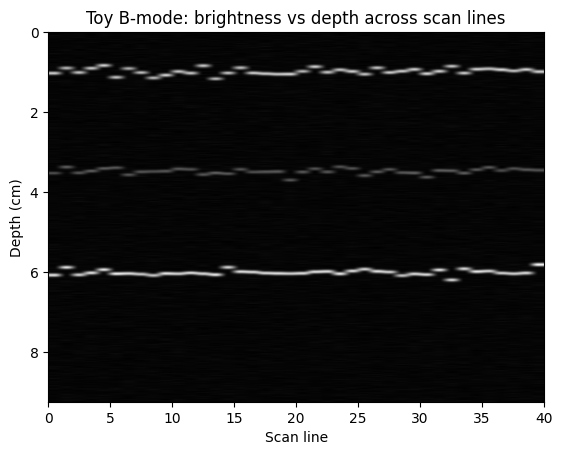

In [10]:
# Toy B-mode: multiple scan lines with slightly varying reflectors
n_lines = 40
depth_axis_cm = depth_cm

B = np.zeros((n_lines, len(depth_axis_cm)))

rng = np.random.default_rng(1)

for j in range(n_lines):
    # jitter reflector depths a little from line to line
    reflectors_j = []
    for d_cm, s in reflectors:
        d_j = d_cm + rng.normal(0, 0.08)  # small depth jitter
        s_j = s * (1 + rng.normal(0, 0.05))
        reflectors_j.append((max(0.2, d_j), max(0.05, s_j)))

    sig = np.zeros_like(t)
    for d_cm, s in reflectors_j:
        d_m = d_cm/100
        t0 = 2*d_m/c
        att = np.exp(-2*alpha*d_m)
        sig += s*att*gaussian_pulse(t, t0)
    sig += 0.02*rng.normal(size=len(sig))

    # Envelope-like brightness (absolute value)
    B[j, :] = np.abs(sig)

# Display as an image: x = lateral line index, y = depth
plt.imshow(B.T, aspect='auto', origin='upper',
           extent=[0, n_lines, depth_axis_cm.max(), depth_axis_cm.min()],
           cmap='gray')
plt.xlabel("Scan line")
plt.ylabel("Depth (cm)")
plt.title("Toy B-mode: brightness vs depth across scan lines")
plt.show()

---
## 🦇 Part 6 — Echolocation: Frequency Choices Across Animals

Different animals use different frequency ranges, depending on:
- target size
- environment (air vs water)
- desired resolution vs range

Humans typically hear ~20 Hz to 20 kHz.
Bats and dolphins can use ultrasonic frequencies far above human hearing.

We’ll compare wavelengths for representative frequencies.


In [11]:
# Representative echolocation / hearing frequencies (approx)
cases = [
    ("Human hearing (upper)", 20000, 343),     # 20 kHz in air
    ("Bat echolocation",      60000, 343),     # 60 kHz in air
    ("Dolphin echolocation", 120000, 1481),   # 120 kHz in water
    ("Medical ultrasound",   5000000, 1540),  # 5 MHz in tissue
]

rows = []
for name, f, v in cases:
    lam = v / f
    rows.append((name, f, v, lam))

rows

[('Human hearing (upper)', 20000, 343, 0.01715),
 ('Bat echolocation', 60000, 343, 0.005716666666666667),
 ('Dolphin echolocation', 120000, 1481, 0.012341666666666667),
 ('Medical ultrasound', 5000000, 1540, 0.000308)]

In [12]:
# Display as a simple table-like printout (no pandas required)
print(f"{'Case':28s} | {'f (Hz)':>10s} | {'v (m/s)':>8s} | {'λ (mm)':>8s}")
print("-"*65)
for name, f, v, lam in rows:
    print(f"{name:28s} | {f:10.0f} | {v:8.0f} | {lam*1000:8.3f}")

Case                         |     f (Hz) |  v (m/s) |   λ (mm)
-----------------------------------------------------------------
Human hearing (upper)        |      20000 |      343 |   17.150
Bat echolocation             |      60000 |      343 |    5.717
Dolphin echolocation         |     120000 |     1481 |   12.342
Medical ultrasound           |    5000000 |     1540 |    0.308


**Interpretation:** Higher frequencies produce shorter wavelengths, which can detect smaller features,
but they also tend to attenuate more strongly (reduced range/penetration).


---
## ⭐ Optional: Interactive Exploration (Frequency Slider)

This interactive cell lets you change ultrasound frequency and immediately see:
- wavelength in tissue  
- attenuation curve with depth  

If sliders don't work in your environment, you can skip this section.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

try:
    from ipywidgets import interact, FloatSlider
except Exception as e:
    print("ipywidgets not available. You can skip this section.")
    print("Error:", e)

def ultrasound_frequency_demo(f_MHz=5.0):
    c = 1540
    lam_mm = (c / (f_MHz*1e6)) * 1000

    # simple attenuation model
    k = 0.6
    alpha = k * f_MHz
    x = np.linspace(0, 0.10, 400)  # 10 cm
    I = np.exp(-2*alpha*x)

    plt.figure(figsize=(6,3))
    plt.plot(x*100, I)
    plt.ylim(0, 1.05)
    plt.xlabel("Depth (cm)")
    plt.ylabel("Relative intensity")
    plt.title(f"Ultrasound: f={f_MHz:.1f} MHz, λ≈{lam_mm:.2f} mm")
    plt.show()

try:
    interact(ultrasound_frequency_demo, f_MHz=FloatSlider(min=1.0, max=15.0, step=0.5, value=5.0))
except Exception as e:
    print("Interactive display not available here. That's okay—skip this section.")
    print("Error:", e)

interactive(children=(FloatSlider(value=5.0, description='f_MHz', max=15.0, min=1.0, step=0.5), Output()), _do…

---
## ⭐ Optional: Real-time Wave Animation (pre-filled)

Animations can be helpful, but may not run in every environment (especially if the notebook is not set up for inline animations).
If it doesn’t work, you can skip it.

This shows a traveling sine wave in 1D.


In [15]:
# Optional advanced animation
import numpy as np
import matplotlib.pyplot as plt

try:
    from matplotlib.animation import FuncAnimation
    from IPython.display import HTML
except Exception as e:
    print("Animation tools not available. You can skip this section.")
    print("Error:", e)

A = 1.0
f = 5.0      # Hz (slow for visualization)
v = 1.0      # m/s
lam = v/f

x = np.linspace(0, 2, 400)
fig, ax = plt.subplots()
line, = ax.plot(x, np.zeros_like(x))
ax.set_ylim(-1.2, 1.2)
ax.set_xlabel("x (m)")
ax.set_ylabel("Wave (a.u.)")
ax.set_title("Traveling Wave Animation")

def update(frame):
    t = frame/60
    y = A*np.sin(2*np.pi*f*t - 2*np.pi*x/lam)
    line.set_ydata(y)
    return (line,)

try:
    ani = FuncAnimation(fig, update, frames=180, interval=30, blit=True)
    plt.close(fig)
    HTML(ani.to_jshtml())
except Exception as e:
    print("Could not render animation inline. You can still run the rest of the notebook.")
    print("Error:", e)

---
## 🚑 Doppler Mini-Section — Measuring Blood Flow with Doppler Ultrasound

Doppler ultrasound uses the fact that **reflected sound changes frequency** when it scatters from moving blood cells.

A common simplified Doppler shift relation is:

$$
\Delta f \approx \frac{2 f_0 v \cos\theta}{c}
$$

Where:
- $\Delta f$: Doppler frequency shift (Hz)
- $f_0$: transmitted ultrasound frequency (Hz)
- $v$: blood velocity along the beam (m/s)
- $\theta$: angle between beam and flow direction
- $c$: speed of sound in tissue (~1540 m/s)

**Key ideas**
- Higher $f_0$ → larger Doppler shift (easier to detect)  
- If $\theta = 90^\circ$, $\cos\theta = 0$ → no Doppler shift (bad angle!)  
- The factor of 2 comes from the wave traveling **to the blood cell and back**.


In [18]:
# Doppler parameters
import math
c = 1540                 # m/s (sound speed in tissue)
f0_MHz = 5.0             # MHz ultrasound frequency
f0 = f0_MHz * 1e6        # Hz

v = 0.4                  # m/s blood speed (order of magnitude)
theta_deg = 60           # degrees (angle between beam and flow)
theta = math.radians(theta_deg)

delta_f = (2 * f0 * v * math.cos(theta)) / c
delta_f

1298.701298701299

The value above is the Doppler shift in **Hz**.

### Try this
- Change `v` (e.g., 0.1 to 1.5 m/s)  
- Change `theta_deg` (0° is best; 90° is worst)  
- Change `f0_MHz` (2–10 MHz)  

What makes the Doppler shift larger?


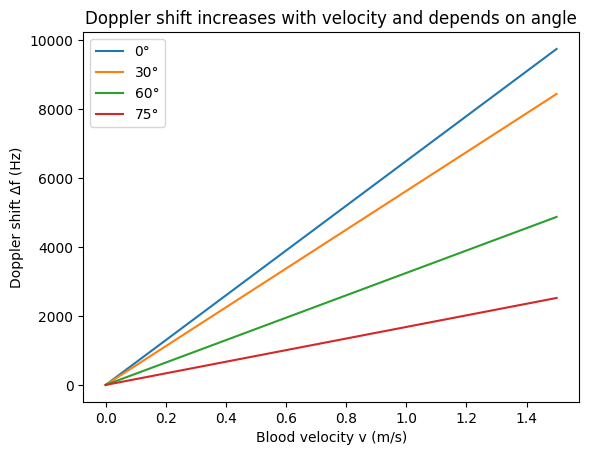

In [19]:
# Visualize Doppler shift vs velocity for different beam angles
import numpy as np
import matplotlib.pyplot as plt
import math

c = 1540
f0 = 5e6
vel = np.linspace(0, 1.5, 200)

angles = [0, 30, 60, 75]  # degrees
for ang in angles:
    th = math.radians(ang)
    df = (2 * f0 * vel * math.cos(th)) / c
    plt.plot(vel, df, label=f"{ang}°")

plt.xlabel("Blood velocity v (m/s)")
plt.ylabel("Doppler shift Δf (Hz)")
plt.title("Doppler shift increases with velocity and depends on angle")
plt.legend()
plt.show()

### Clinical intuition
- Arteries with stenosis can have **higher velocities**, which increases Doppler shift.  
- Angle correction matters: inaccurate $\theta$ leads to inaccurate velocity estimates.

You don’t need to memorize the formula—focus on the **dependencies**.


---
## ⭐ Optional: Interactive Doppler Slider (pre-filled)

If sliders work in your environment, use this to explore Doppler shift quickly.
If not, you can skip it.


In [20]:
import math
try:
    from ipywidgets import interact, FloatSlider, IntSlider
except Exception as e:
    print("ipywidgets not available. You can skip this section.")
    print("Error:", e)

def doppler_shift_demo(v=0.4, theta_deg=60, f0_MHz=5.0):
    c = 1540
    f0 = f0_MHz * 1e6
    theta = math.radians(theta_deg)
    df = (2 * f0 * v * math.cos(theta)) / c
    return df

try:
    interact(
        doppler_shift_demo,
        v=FloatSlider(min=0.0, max=2.0, step=0.05, value=0.4, description="v (m/s)"),
        theta_deg=IntSlider(min=0, max=90, step=5, value=60, description="theta (deg)"),
        f0_MHz=FloatSlider(min=1.0, max=15.0, step=0.5, value=5.0, description="f0 (MHz)")
    )
except Exception as e:
    print("Interactive display not available here. That's okay—skip this section.")
    print("Error:", e)

interactive(children=(FloatSlider(value=0.4, description='v (m/s)', max=2.0, step=0.05), IntSlider(value=60, d…

---
## 🧠 Big Picture Takeaways

- A wave is characterized by **amplitude, frequency, wavelength**, and **speed**
- The universal relationship is **v = f·λ**
- **Intensity increases quickly** as amplitude increases (often ∝ A²)
- In tissue, higher ultrasound frequency → **shorter wavelength** (better resolution) but **more attenuation** (less penetration)
- Ultrasound imaging relies on **pulse–echo timing** to estimate depth
- Animals choose echolocation frequencies based on the resolution/range trade-off

Next: Chapter 9 (Light and Optics) explores waves in a different regime (electromagnetic).
